### This part trains a neural network so the traind model can give corect results.
Reads the dataset and then then presents the input and the result to the network so it can calibrate the network.
The result of the training is shown below and it reaches 10% after 3 epocs, the network continues to get better since both the training loss and the validation loss decreases. This means that it will generalise better in the future if it is given data from the same distribution that it has not seen before.
This will be tested below...

epoch,train_loss,valid_loss,accuracy
1,2.435698,2.634559,0.142857
2,2.198255,2.563692,0.214286
3,1.951871,2.336534,0.464286
4,1.711654,1.971918,0.607143
5,1.492004,1.612031,0.607143
6,1.298754,1.264700,0.821429
7,1.135541,0.961279,0.910714
8,0.999096,0.732099,0.910714
9,0.890529,0.584741,0.910714
10,0.804311,0.491845,0.910714


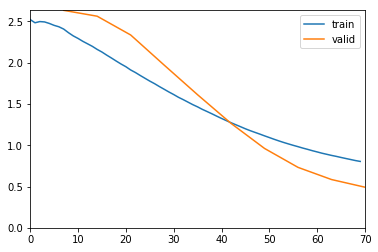

CPU times: user 4.54 s, sys: 3.78 s, total: 8.32 s
Wall time: 9.32 s


In [22]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *
dataSet = pd.read_csv("skane_around.csv")
dataSet = dataSet.sample(frac=1).reset_index(drop=True)
dataSet_used = dataSet[['longitude','latitude','weekday','journey']]
cont_names =['longitude','latitude']
cat_names = ['weekday']
valid_idx = list(np.random.randint(0,len(dataSet_used),int(len(dataSet_used)*0.1)))
data = (TabularList.from_df(dataSet_used,cont_names=cont_names,cat_names=cat_names, procs=[FillMissing, Categorify, Normalize])
    .split_by_idx(valid_idx)
    .label_from_df(cols='journey')
    .databunch())
learner=tabular_learner(data, layers=[200,100],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(10)

## Using Geohash

epoch,train_loss,valid_loss,accuracy
1,2.699399,2.633167,0.107143
2,2.529014,2.609643,0.160714
3,2.315669,2.532876,0.196429
4,2.090210,2.406890,0.178571
5,1.846823,2.232366,0.321429
6,1.617603,1.954688,0.446429
7,1.389197,1.631808,0.642857
8,1.196292,1.283031,0.767857
9,1.032844,0.886024,0.928571
10,0.896338,0.614482,0.928571


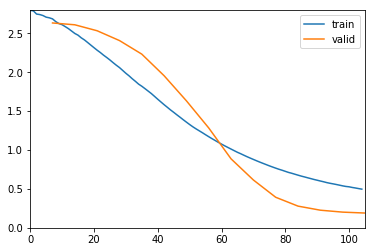

CPU times: user 6.51 s, sys: 5.61 s, total: 12.1 s
Wall time: 13.5 s


In [23]:
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *
dataSet = pd.read_csv("skane_around.csv")
dataSet_used = dataSet[['geoHash','weekday','journey']]
cat_names  = ['weekday']
cont_names  = ['geoHash']
valid_idx = list(np.random.randint(0,len(dataSet),int(len(dataSet)*0.1)))
data = (TabularList.from_df(dataSet_used,cont_names=cont_names,cat_names=cat_names,procs=[FillMissing, Categorify, Normalize])
    .split_by_idx(valid_idx)
    .label_from_df(cols='journey')
    .databunch())
learner=tabular_learner(data, layers=[200,100],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(15)

### Ok time to test it
Read in the other file and the trained model gives the correct results.

In [13]:
result = 0
accuracy = 0
dataTestSet = pd.read_csv("dataTest.csv")
for x in range(0,dataTestSet.shape[0]):
    correct = int(dataTestSet.iloc[x].journey)  #remove journey
    predicted = learner.predict(dataTestSet.iloc[x]);
    if (str(correct)==str(predicted[0])):
        result=result+1
accuracy=result/dataTestSet.shape[0]
print (str(accuracy*100)+"% of the rows were correct.")

100.0% of the rows were correct.


In [18]:
dataSet = pd.read_csv("skane_around.csv")
dataSet = dataSet.sample(frac=1).reset_index(drop=True)
dataSet_used = dataSet[['longitude','latitude','geoHash','journey']]
dataSet_used.head(50)

,longitude,latitude,geoHash,journey
0,14.149379,56.022792,1254857207,9004291069
1,12.999619,55.608846,1242213299,8000086239
2,12.698897,56.044966,1242669495,8324193070
3,13.763237,56.158637,1244039323,9307090042
4,12.998310,55.606902,1242213175,8000086239
5,12.692601,56.046264,1242669495,8324193070
6,13.832761,55.429897,1242018743,8623980000
7,12.694696,56.043863,1242669495,8324181216
8,13.761155,56.157937,1244039323,9307090042
9,12.695286,56.044749,1242669495,8324193070
